In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/high_diamond_ranked_10min.csv")

In [ ]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

There are no null/ missing values to be removed

### **EDA**

In [ ]:
df1 = df.copy()

Check relationships of Blue Team's features

In [ ]:
# Only keep the Blye Team
cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds']
df1 = df1.drop(cols, axis = 1)

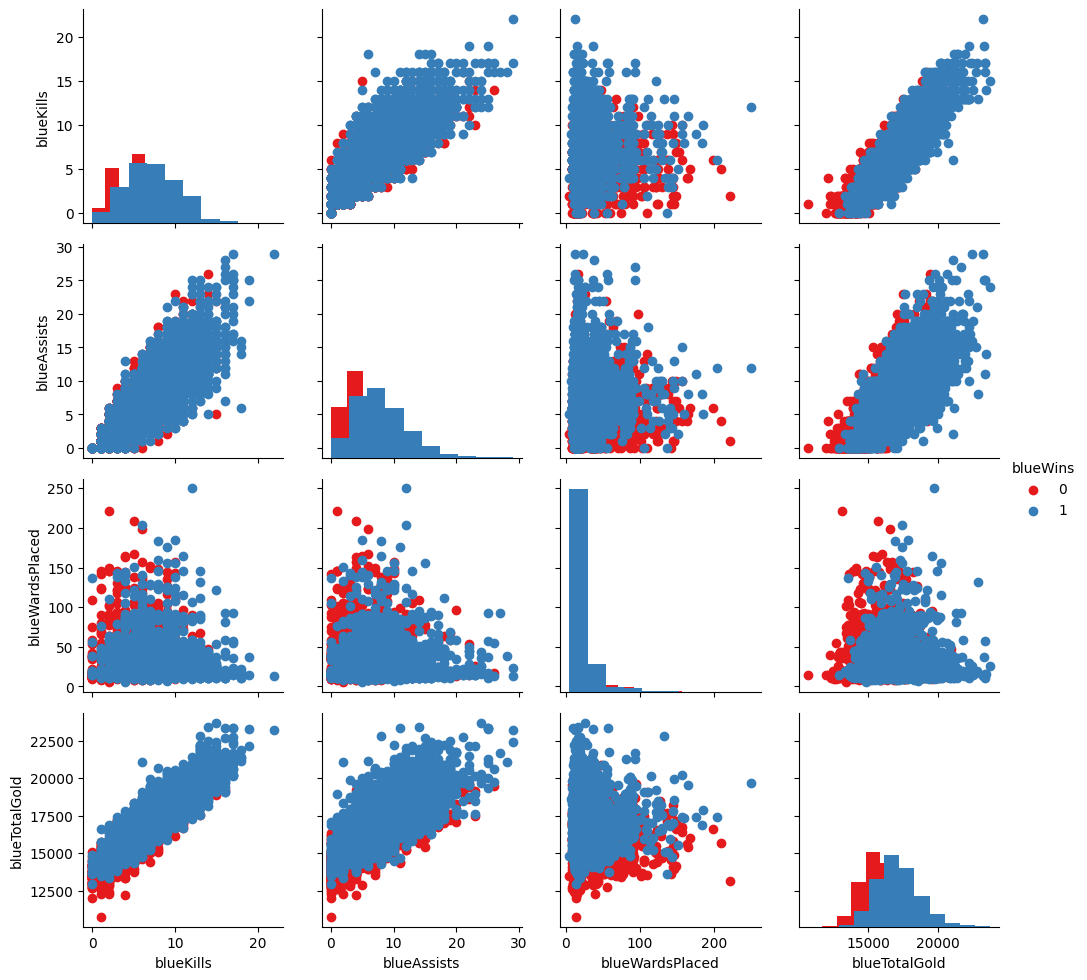

In [ ]:
g = sns.PairGrid(data=df1, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

Check Collinearity of Blue Team features

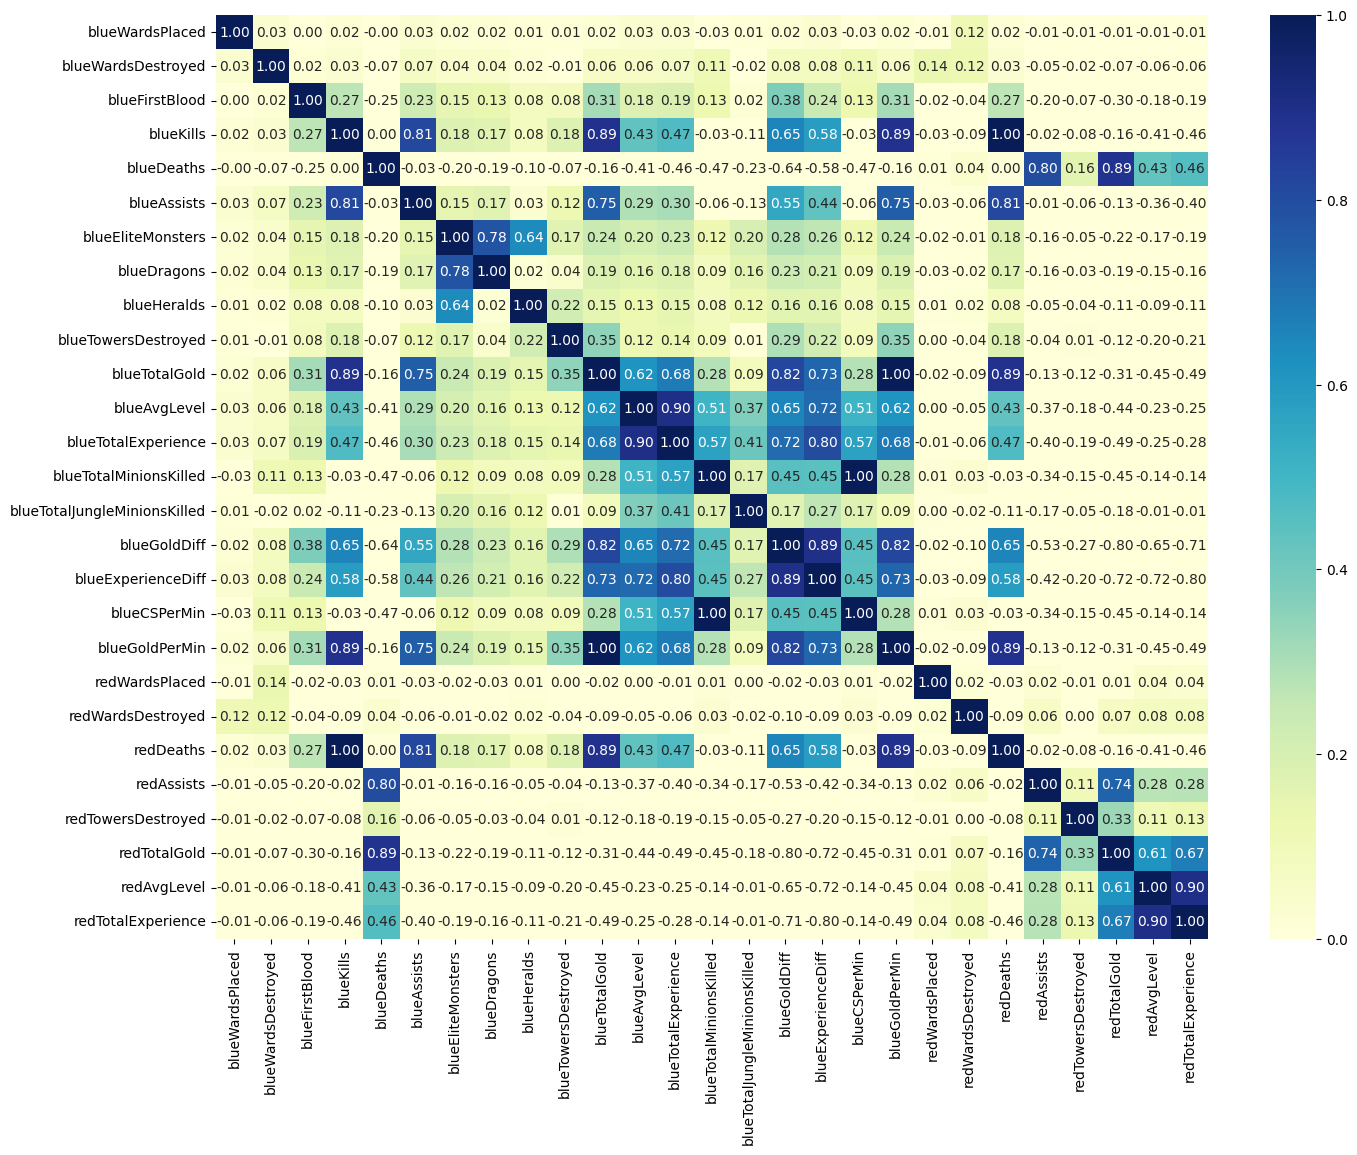

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df1.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

Clean the dataset based on the collinearity

In [ ]:
cols = ['blueAvgLevel', 'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTowersDestroyed',
       'redTotalExperience', 'redTotalGold', 'redAvgLevel']
df1 = df1.drop(cols, axis=1)

In [ ]:
# Find the collumns with little impact/ correlation to Blue Wins
corr_list = df1[df1.columns[1:]].apply(lambda x: x.corr(df1['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.2 or corr_list[col]<-0.2):
        cols.append(col)
cols

['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin']

In [ ]:
## Drop the collumns with littel impact/ correlation with Blue Wins
df1 = df1[cols]
df1.head()

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,1,9,6,11,0,0,17210,17039,195,643,-8,19.5,1721.0
1,0,5,5,5,0,0,14712,16265,174,-2908,-1173,17.4,1471.2
2,0,7,11,4,1,1,16113,16221,186,-1172,-1033,18.6,1611.3
3,0,4,5,5,1,0,15157,17954,201,-1321,-7,20.1,1515.7
4,0,6,6,6,0,0,16400,18543,210,-1004,230,21.0,1640.0


Create a histogram of of cleaned, new dataframe

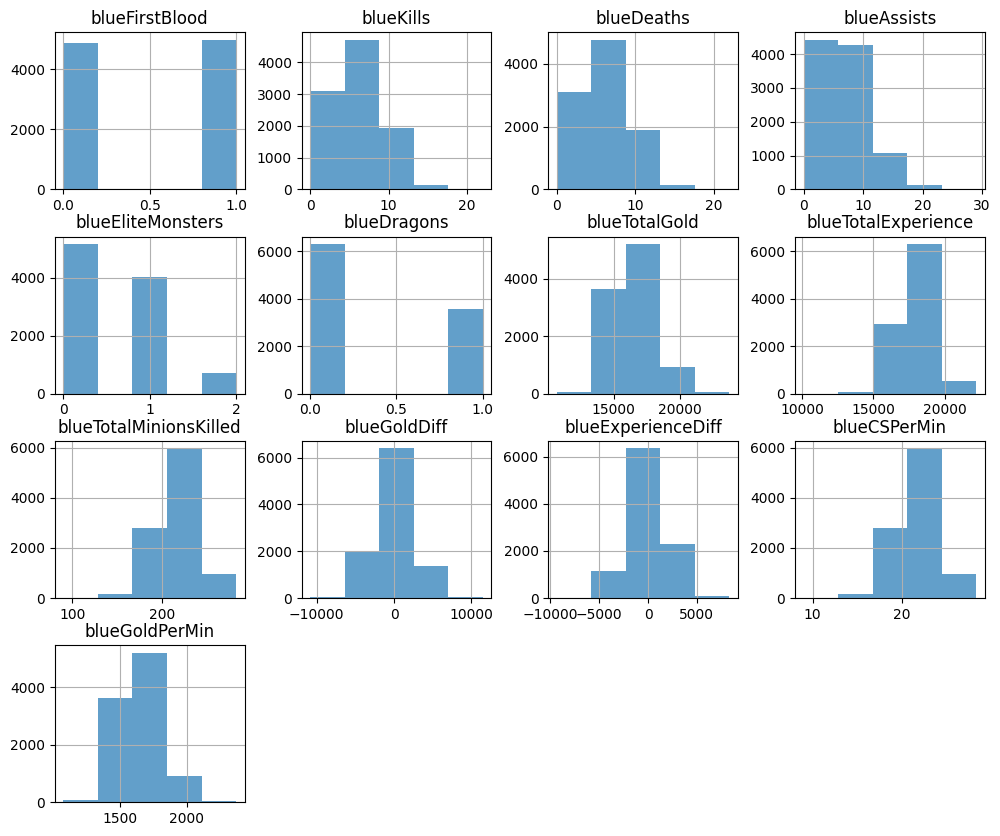

In [ ]:
df1.hist(alpha = 0.7, figsize=(12,10), bins=5);

### **Train Test Split**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df1
y = df['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Random Forest**

In [ ]:
# fit the decision tree model
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

tree = tree.DecisionTreeClassifier()

# search the best params
grid = {'min_samples_split': [5, 10, 20, 50, 100]},

clf_tree = GridSearchCV(tree, grid, cv=5)
clf_tree.fit(X_train, y_train)

pred_tree = clf_tree.predict(X_test)

# get the accuracy score
acc_tree = accuracy_score(pred_tree, y_test)
print(acc_tree)

0.7049595141700404


In [ ]:
feature_names = df1.columns
class_names = ['Lose', 'Win']

print("Feature names:", list(feature_names))
print("Class names:", list(class_names))

Feature names: ['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueTotalGold', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin']
Class names: ['Lose', 'Win']


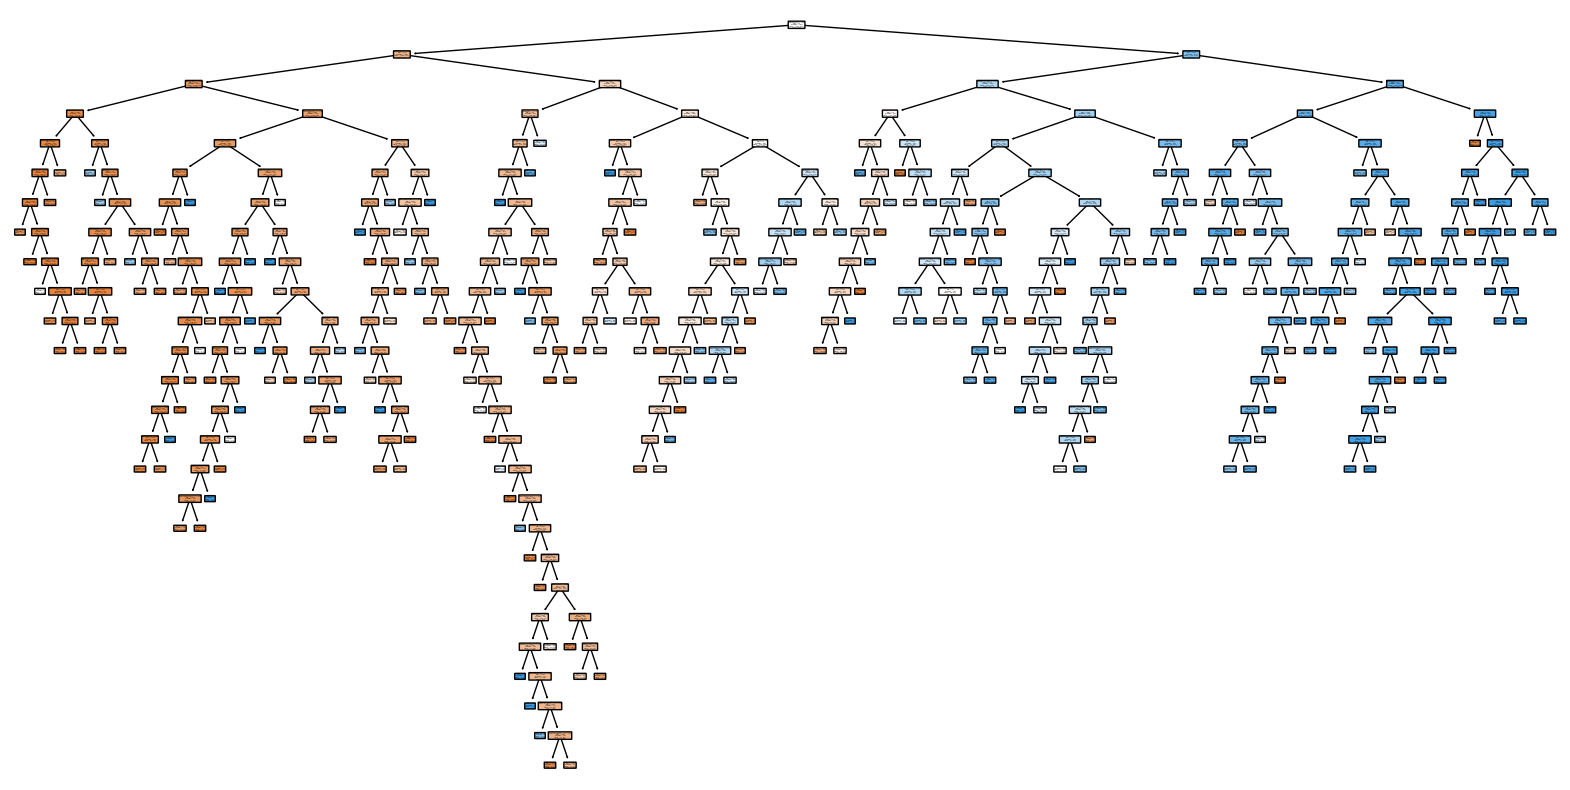

In [ ]:
from sklearn.tree import plot_tree

# Extract the best estimator
best_tree = clf_tree.best_estimator_

# plot the best decision tree
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, rounded=True, feature_names=feature_names, class_names=class_names)
plt.show()

Simplify the Decision Tree

In [ ]:
from sklearn import tree
tree1 = tree.DecisionTreeClassifier()

# search the best params
grid = {'min_samples_split': [5]},

clf_tree1 = GridSearchCV(tree1, grid, cv=5)
clf_tree1.fit(X_train, y_train)

pred_tree1 = clf_tree1.predict(X_test)

# get the accuracy score
acc_tree1 = accuracy_score(pred_tree, y_test)
print(acc_tree1)

0.7049595141700404


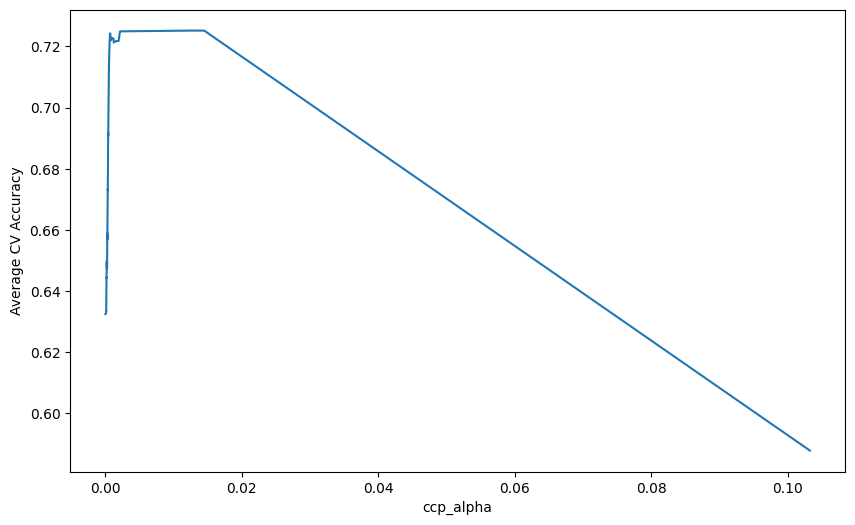

Optimal ccp_alpha: 0.012722164886221854


DecisionTreeClassifier(ccp_alpha=0.012722164886221854, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier

clf = tree.DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Evaluate the effect of ccp_alpha on cross-validation accuracy
accuracy_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    accuracy_scores.append(np.mean(scores))

# Plot the accuracy scores against ccp_alpha values
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracy_scores)
plt.xlabel('ccp_alpha')
plt.ylabel('Average CV Accuracy')
plt.show()

# Select the ccp_alpha that maximizes accuracy
optimal_ccp_alpha = ccp_alphas[np.argmax(accuracy_scores)]
print('Optimal ccp_alpha:', optimal_ccp_alpha)

# Rebuild the tree using the optimal ccp_alpha
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
clf.fit(X_train, y_train)


In [ ]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
clf.fit(X_train, y_train)

pred_tree2 = clf.predict(X_test)

# get the accuracy score
acc_tree2 = accuracy_score(pred_tree2, y_test)
print(acc_tree2)

0.7191295546558705


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# search the best params
grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

clf_rf = GridSearchCV(rf, grid, cv=5)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)
# get the accuracy score
acc_rf = accuracy_score(pred_rf, y_test)
print(acc_rf)

0.729757085020243


### **PCA**

In [ ]:
X = df1
y = df['blueWins']

# PCA is affected by scale, scale the dataset first
from sklearn import preprocessing
# Standardizing the features
X = preprocessing.StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.4707753  0.19019606]


In [ ]:
# create visulization df

df_vis = pd.DataFrame(data = components, columns = ['pc1', 'pc2'])
df_vis = pd.concat([df_vis, df['blueWins']], axis = 1)
X = df_vis[['pc1', 'pc2']]
y = df_vis['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# refit the pca data into random forest
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [ ]:
# visualize function
from matplotlib.colors import ListedColormap
def DecisionBoundary(clf):
    X = df_vis[['pc1', 'pc2']]
    y = df_vis['blueWins']

    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

#Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


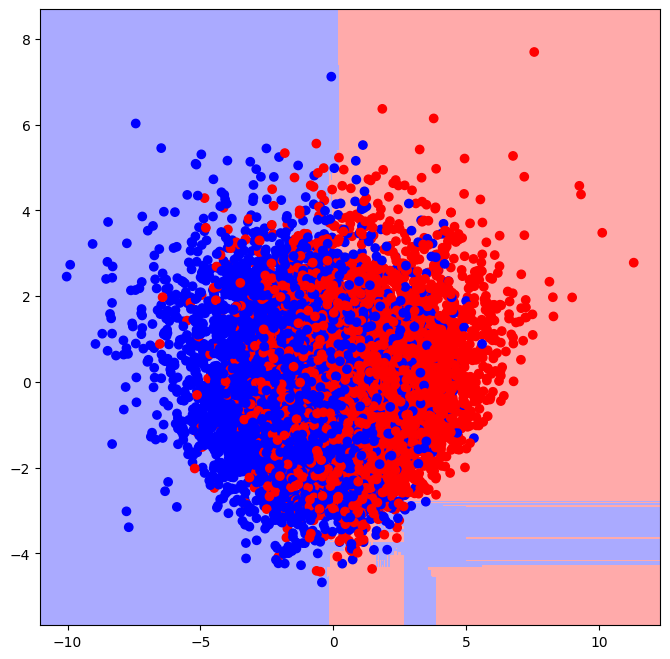

In [ ]:
DecisionBoundary(clf_rf)